In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
#mpl.rc('font', family='Times New Roman')
#font = {'fontname':'Times New Roman'}
size = {'fontsize':12}

In [2]:
# Functions

#MAKE SURE THAT THE HEADER IS THE SAME! PMMA IS NOT
#add 4 lines of: ,, anywhere before the data in PMMA and this will even it out
def file_reader(files):
    files = glob.glob(files)
    data = {}
    for file in files:
        name = (file.split('/')[1]).split('_')[0][4:]
        data[name] = np.array(pd.read_csv(file,header=28))
    return data

def ques1(array):
    return np.mean(array), np.median(array), np.std(array), np.std(array) / np.mean(array)

def ques3(array,radius):
    area = np.pi * radius**2 / 4
    stress = array[:,2] / area
    strain = array[:,3]
    return strain,stress*1000 #put into MPa, kn/mm = 1000MPa
'''
Data Construction
'''

Dict = file_reader('data/*.csv')
flat = np.array(pd.read_csv('data/hardness.txt',sep='\t'))
alb = flat[:,0][flat[:,0] != 0.0]
stb = flat[:,1][flat[:,1] != 0.0]
alrb = flat[:,2]
strb = flat[:,3]
alrc = flat[:,4]
strc = flat[:,5]

In [3]:
# Question 1
question1_table = pd.DataFrame([ques1(alb), ques1(stb),
                                ques1(alrb), ques1(strb),
                                ques1(alrc), ques1(strc)]).T
question1_table.columns = ['2024 Brinnel','4340 Brinnel','2024 Rockwell B','4340 Rockwell B','2024 Rockwell C', '4340 Rockwell C']
question1_table.index = ['Mean','Median', 'Standard Deviation', 'Coefficient of Variation']

question1_table

,2024 Brinnel,4340 Brinnel,2024 Rockwell B,4340 Rockwell B,2024 Rockwell C,4340 Rockwell C
Mean,140.900000,740.500000,86.475000,121.485000,4.115000,63.040000
Median,138.000000,731.000000,86.650000,121.550000,5.200000,62.850000
Standard Deviation,6.171710,38.129385,2.927093,0.976870,3.033360,1.495460
Coefficient of Variation,0.043802,0.051491,0.033849,0.008041,0.737147,0.023722


In [12]:
# Question 2
# steelexpress.co.uk/steel-hardness-conversion.html

def interpolate(b, b0, b1, r0, r1):
    r = r0 + (r1 - r0) / (b1 - b0) * (b - b0)
    return b,r

# coverting
print("2024, Rb to B lr:", interpolate(86.475, 86, 87, 169, 172))
print("2024, Rb to B se:", interpolate(86.475, 86, 87, 167, 170))
print("4340, Rc to B:", interpolate(62.85, 63, 64, 681, 695))

2024, Rb to B lr: (86.475, 170.42499999999998)
2024, Rb to B se: (86.475, 168.42499999999998)
4340, Rc to B: (62.85, 678.9)


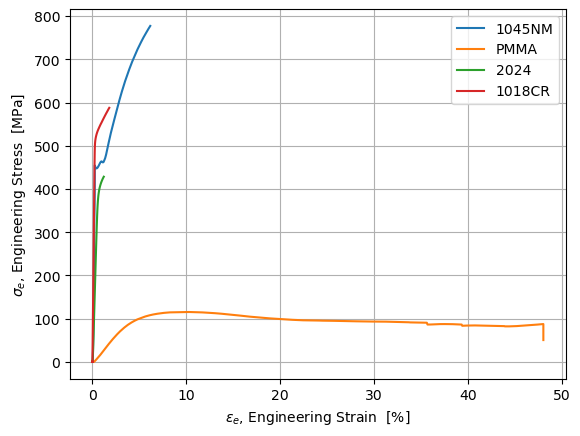

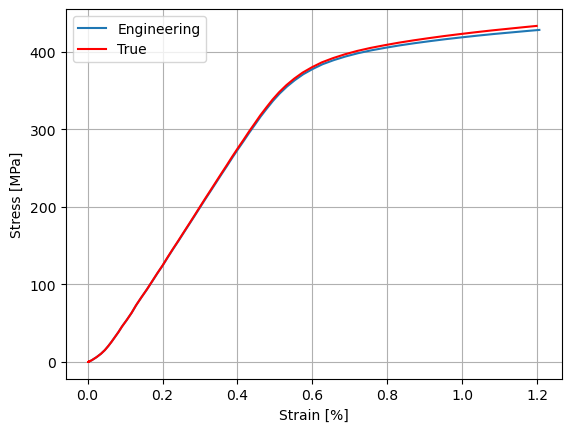

In [5]:
# Question 3
radii = [12.80, 19.16, 12.80, 12.72]
for i,k in enumerate(Dict.keys()):
    x,y = ques3(Dict[k],radii[i])
    plt.plot(x*100,y,label=k)
plt.legend()
plt.grid()
plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.savefig('plots/q3_all.png',dpi=600)
plt.show()

al2024 = Dict['2024']
estrain,estress = ques3(al2024,radii[0])
tstrain,tstress = np.log(1+estrain),estress*(1+estrain)
plt.plot(estrain*100,estress, label = 'Engineering')
plt.plot(tstrain*100,tstress, c="r", label = 'True')
plt.grid()
plt.xlabel(r'Strain [%]')
plt.ylabel(r'Stress [MPa]')
plt.legend()
plt.savefig('plots/q3_engvtru.png',dpi = 600)
plt.show()

In [6]:
# Question 4
for keys in Dict:
    print(keys)
# elastic modulus is the slope
# engineering 0.2% offset yield strength is the intercept at the top with 0.2% offset
# ultimate strength is the max stress value

mats = ["1045NM", "PMMA", "2024", "1018CR"]
x1045NM, y1045NM = [], []
xPMMA, yPMMA = [], []
x2024, y2024 = [], []
x1018CR, y1018CR = [], []

xs = [x1045NM, xPMMA, x2024, x1018CR]
ys = [y1045NM, yPMMA, y2024, y1018CR]

#radii = [12.80, 19.16, 12.80, 12.72]
radii = [12.72, 19.16, 12.80, 12.80]

for i,k in enumerate(Dict.keys()):
    xs[i],ys[i] = ques3(Dict[k],radii[i])

for i in range(len(xs)):
    xs[i] = 100 * xs[i]
    
def plot_checker(x,y,drops):
    plt.plot(x,y)
    [plt.axvline(drop, label=drop, ls=(0,(5,3)), c="k") for drop in drops]

q4d = {"1045NM": {"e": {}, ".2": {}, "u": {}},
       "PMMA": {"e": {}, ".2": {}, "u": {}},
       "2024": {"e": {}, ".2": {}, "u": {}},
       "1018CR": {"e": {}, ".2": {}, "u": {}}}

1045NM
PMMA
2024
1018CR


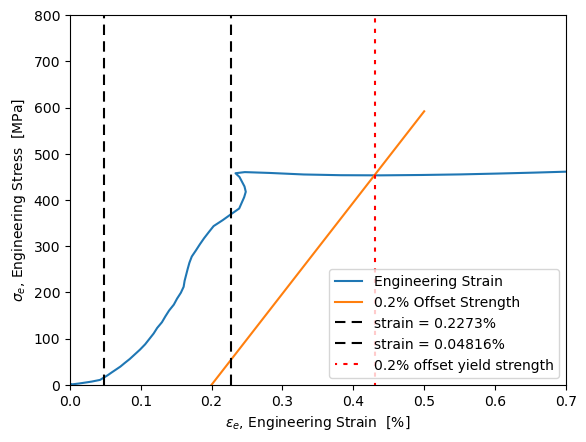

In [7]:
# 1045NM
i1, i2 = 43, 12
m1 = 0

drops = [xs[m1][i1], xs[m1][i2]]

plt.plot(xs[m1], ys[m1], label='Engineering Strain')

m = (ys[m1][i1] - ys[m1][i2]) / (xs[m1][i1] - xs[m1][i2])
x = np.linspace(.2, .5, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
plt.axvline(0.43, label= "0.2% offset yield strength", ls=(1,(2,3)), c="r")

plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.xlim(0,.7)
plt.ylim(0,800)
plt.savefig("plots/q4-1045NM.png", dpi=600)

q4d["1045NM"]["e"] = m / 10
q4d["1045NM"][".2"] = m * 0.43 + b
q4d["1045NM"]["u"] = np.max(ys[m1])

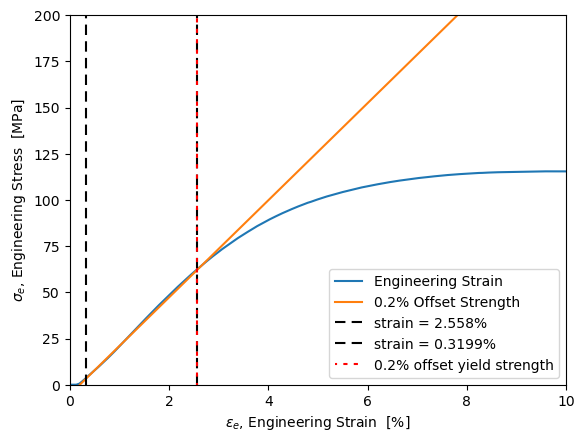

In [8]:
# PMMA
i1, i2 = 40, 5
m1 = 1

drops = [xs[m1][i1], xs[m1][i2]]

plt.plot(xs[m1], ys[m1], label='Engineering Strain')

m = (ys[m1][i1] - ys[m1][i2]) / (xs[m1][i1] - xs[m1][i2])
x = np.linspace(.2, 10, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
plt.axvline(xs[m1][i1], label= "0.2% offset yield strength", ls=(1,(2,3)), c="r")

plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.xlim(0,10)
plt.ylim(0,200)
plt.savefig("plots/q4-PMMA.png", dpi=600)

q4d["PMMA"]["e"] = m / 10
q4d["PMMA"][".2"] = m * xs[m1][i1] + b
q4d["PMMA"]["u"] = np.max(ys[m1])

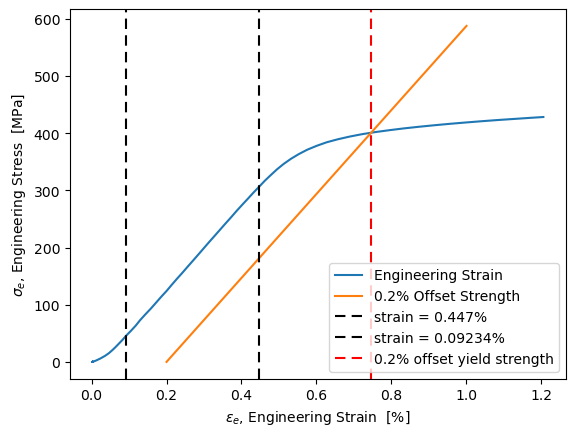

In [9]:
# 2024
i1, i2 = 55, 30
m1 = 2

drops = [xs[m1][i1], xs[m1][i2]]

plt.plot(xs[m1], ys[m1], label='Engineering Strain')

m = (ys[m1][i1] - ys[m1][i2]) / (xs[m1][i1] - xs[m1][i2])
x = np.linspace(.2, 1, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
plt.axvline(0.746, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

#plt.xlim(.735,.75)
#plt.ylim(0,1500)
plt.savefig("plots/q4-2024.png", dpi=600)

q4d["2024"]["e"] = m / 10
q4d["2024"][".2"] = m * 0.746 + b
q4d["2024"]["u"] = np.max(ys[m1])

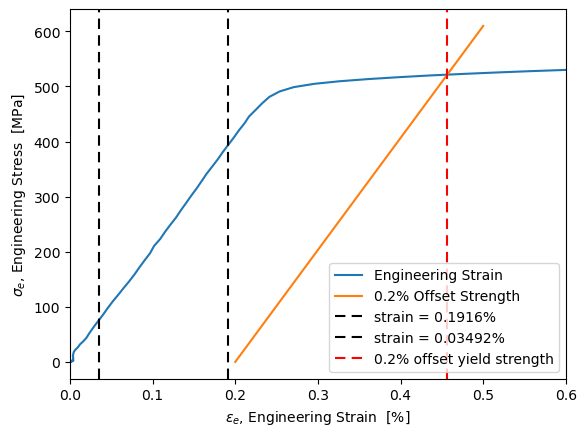

In [10]:
# 1018CR
# 2024
i1, i2 = 75, 50
m1 = 3

drops = [xs[m1][i1], xs[m1][i2]]

plt.plot(xs[m1], ys[m1], label='Engineering Strain')

m = (ys[m1][i1] - ys[m1][i2]) / (xs[m1][i1] - xs[m1][i2])
x = np.linspace(.2, .5, 1000)
b = - m * 0.2
y = m * x + b

plt.plot(x,y, label="0.2% Offset Strength")
[plt.axvline(drop, label= "strain = {}%".format(round(drop,8)), ls=(0,(5,3)), c="k") for drop in drops]
plt.axvline(.4564, label= "0.2% offset yield strength", ls=(0,(5,3)), c="r")

plt.xlabel(r'$\epsilon_e$, Engineering Strain  [%]')
plt.ylabel(r'$\sigma_e$, Engineering Stress  [MPa]')
plt.legend()

plt.xlim(0,.6)
#plt.ylim(0,400)
plt.savefig("plots/q4-1018CR.png", dpi=600)

q4d["1018CR"]["e"] = m / 10
q4d["1018CR"][".2"] = m * .4564 + b
q4d["1018CR"]["u"] = np.max(ys[m1])

In [13]:
q4df = pd.DataFrame(q4d)
q4df.index = ["Elastic Modulus [GPa$^{-1}$]", "0.2% Offset Yield Strength [MPa]", "Ultimate Strength [MPa]"]
# should be like 2000 for the 1045
# /10 for everything
q4df

,1045NM,PMMA,2024,1018CR
Elastic Modulus [GPa$^{-1}$],197.277116,2.626228,73.459295,203.263392
0.2% Offset Yield Strength [MPa],453.737367,61.926460,401.087751,521.167336
Ultimate Strength [MPa],786.929626,115.495042,428.350609,580.356013
